<a href="https://colab.research.google.com/github/Omgupta0312/Machine-Learning-Minor-Projects/blob/new1/Iris_Flower_classification_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **IRIS FLOWER CLASSIFICATION ML PROJECT**


---


---



#  **IRIS DATASET ANALYSICS**



*   Dataset Information
    
   * The dataset contains 3 classes of 50 instances each,where each class refers to a type of iris plant.
   * One class is linearly seperable from the others 2;latter are not linearly seperable from each other.

* Attributes - SepalLength ,SepalWidth,PetalLength and PetalWidth all are in cm's and classes are as follows - 1.Iris Setosa, 2.Iris Versicolour & 3. Iris Virginica.   




---



---



In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
uploaded = files.upload()

Saving ic.jpg to ic.jpg


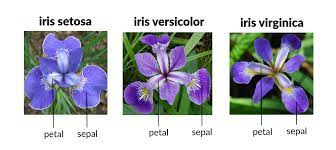

In [ ]:
image = cv2.imread("ic.jpg")
cv2_imshow(image)




---



---


##**STEP 01 IMPORTING LIBRARIES**


---



---



In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns



---



---


##**STEP 02 UPLOADING THE DATASET**


---



---



In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Iris (3).csv to Iris (3).csv


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "Iris (3).csv" with length 5107 bytes




---



---


##**STEP 03 LOADING THE DATASET**


---



---



In [ ]:
df=pd.read_csv('Iris (3).csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df=df.drop(columns=['Id'])

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#TO DISPLAY STATS ABOUT DATA
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#TO DISPLAY NO.OF SAMPLES ON EACH CLASS
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64



---



---
##**STEP 04 PREPROCESSING THE DATASET**


---



---



In [ ]:
#CHECKING NULL VALUES
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64



---



---

##**STEP 05  EXPLORATORY DATA ANALYSICS**
##Data visualization


---



---



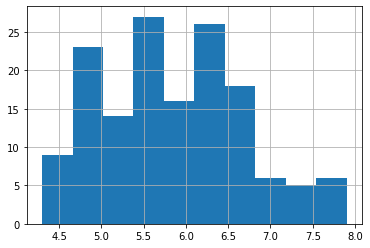

In [ ]:
df['SepalLengthCm'].hist()

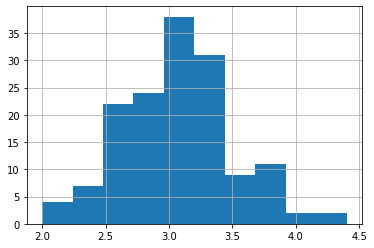

In [ ]:
df['SepalWidthCm'].hist()

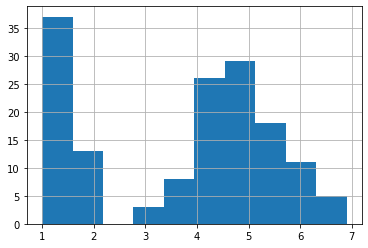

In [ ]:
df['PetalLengthCm'].hist()

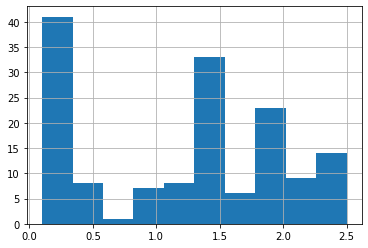

In [ ]:
df['PetalWidthCm'].hist()

In [ ]:
#SCATTERPLOT
colors=['red','orange','blue']
species=['Iris-setosa','Iris-virginica' ,'Iris-versicolor']

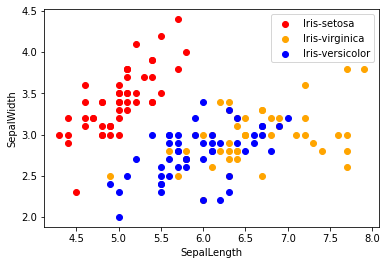

In [ ]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
  plt.xlabel("SepalLength")
  plt.ylabel('SepalWidth')
  plt.legend()

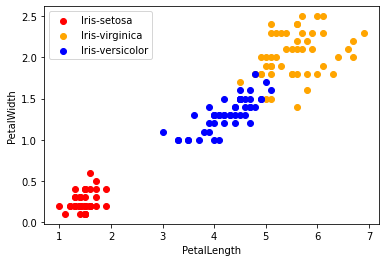

In [ ]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
  plt.xlabel("PetalLength")
  plt.ylabel('PetalWidth')
  plt.legend()

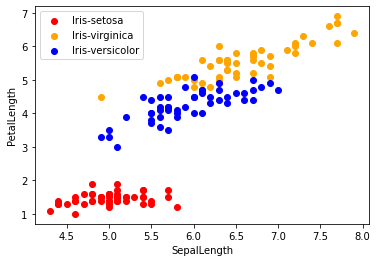

In [ ]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i])
  plt.xlabel("SepalLength")
  plt.ylabel('PetalLength')
  plt.legend()

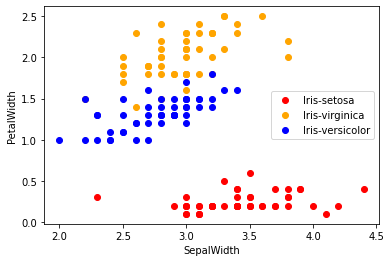

In [ ]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
  plt.xlabel("SepalWidth")
  plt.ylabel('PetalWidth')
  plt.legend()



---



---


**CORRELATION MATRIX** - A correlation matrix is a table showing correlation coefficients betweeen variables .Each cell in the table shows the coorelation btw two variables. The values is in the range of -1 to +1 . If two variables have high correlation,we can neglect one variable from those two.


---



---



In [ ]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


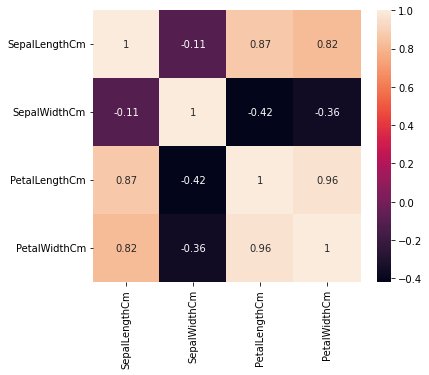

In [ ]:
corr=df.corr()
fig, ax =plt.subplots(figsize=(6,5))
sns.heatmap(corr,annot =True,ax=ax)



---



---


**LABEL ENCODER**- In machine learning, we usually deals with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoders refers to convertiong th labels into numeric form so as to convert it into the machine readable form


---



---



In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['Species']=le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0




---



---


##**STEP 06 MODEL TRAINING**


---



---



In [ ]:
from sklearn.model_selection import train_test_split #train -70; test -30
X=df.drop(columns=['Species'])
Y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [ ]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#PRIBT METRIC TO GET PERFORMANCE
print("Accuracy : ",model.score(x_test,y_test)*100)

Accuracy :  97.77777777777777


In [ ]:
#knn - k-nearest neigthbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [ ]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
print("Accuracy : ",model.score(x_test,y_test)*100)

Accuracy :  100.0


In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print("Accuracy : ",model.score(x_test,y_test)*100)

Accuracy :  95.55555555555556
